In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.datasets import make_blobs, make_moons
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [4]:
# Generate synthetic 2D data with three clusters
X, y = make_blobs(n_samples=300, centers=10, random_state=42)

In [55]:
# Fit a Gaussian Mixture Model with three components
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(X)

# Predict cluster labels
labels = gmm.predict(X)

bgmm = BayesianGaussianMixture(n_components=10, random_state=42)
bgmm.fit(X)
labels2 = bgmm.predict(X)

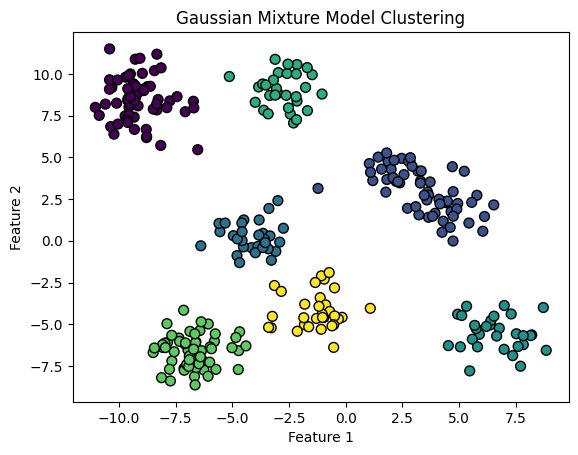

In [58]:
# Plot the original data and cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=labels2, cmap='viridis', edgecolors='k', s=50)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

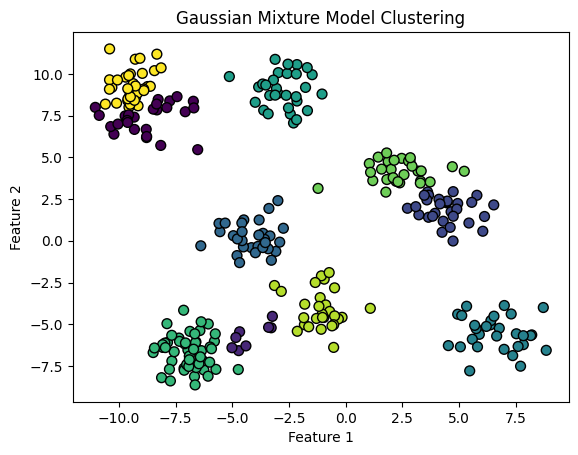

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [23]:
knn = NearestNeighbors(n_neighbors=3)
knn.fit(X)
X2 = np.random.randn(50, 2)*5
labels = knn.kneighbors(X2, return_distance=False)
print(labels)

[[193 182 188]
 [ 42 239  73]
 [  3 121 242]
 [ 48  67 261]
 [151  34  58]
 [ 68 265  51]
 [ 57 263  99]
 [178 210 121]
 [280 167 220]
 [169  13 224]
 [ 12   9 267]
 [265  24  51]
 [207 124 132]
 [183 101 140]
 [281 170  37]
 [227 127 290]
 [144 273  33]
 [ 50 294 206]
 [246 280   7]
 [231 110 147]
 [252 281 257]
 [ 33   0 144]
 [280 167 220]
 [118 132   9]
 [  0 144  33]
 [202  89 256]
 [221  90  88]
 [195 231 110]
 [265  24  51]
 [227 127 241]
 [240 181 179]
 [179  41  83]
 [126  79 288]
 [207 124  85]
 [190 142  53]
 [ 42 153  81]
 [265  68  51]
 [193 182 188]
 [143 129  22]
 [ 89 202  12]
 [183 193 101]
 [ 76 151   6]
 [ 42  73 178]
 [141 295 291]
 [ 41 258 179]
 [204 289  14]
 [170 183 101]
 [  9 118  68]
 [201 124 207]
 [ 44 157  47]]


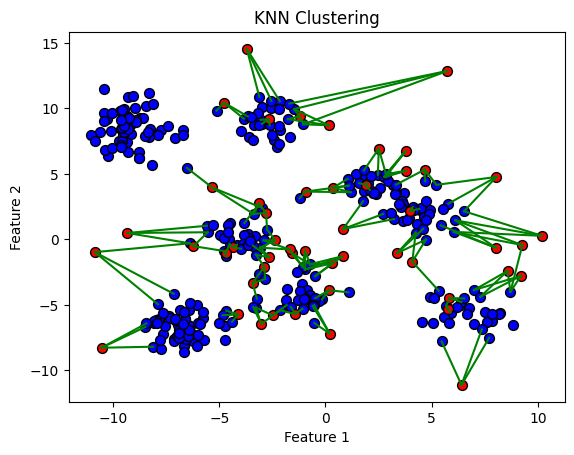

In [24]:

plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolors='k', s=50)
plt.scatter(X2[:, 0], X2[:, 1], c='red', edgecolors='k', s=50)
for i in range(X2.shape[0]):
    for j in labels[i]:
        plt.plot(*zip(X2[i], X[j]), color='green')
plt.title('KNN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



In [34]:
Kmens = KMeans(n_clusters=3, random_state=42)
Kmens.fit(X)
labels = Kmens.predict(X)


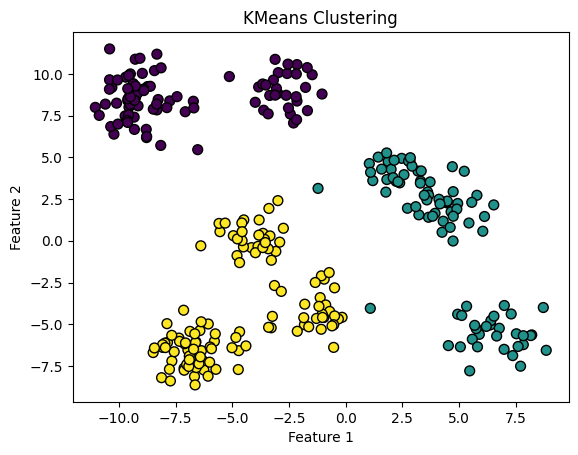

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [37]:
X2, Y2 = make_moons(n_samples=300, noise=0.1)

In [61]:
Kmens = KMeans(n_clusters=2, random_state=42)
Kmens.fit(X2)
labels_k = Kmens.predict(X2)

GMM = BayesianGaussianMixture(n_components=10, random_state=42)
GMM.fit(X2)
labels_g = GMM.predict(X2)

DBS = DBSCAN(eps=0.2, min_samples=5)
DBS.fit(X2)
labels_d = DBS.fit_predict(X2)

LDA = QuadraticDiscriminantAnalysis()
LDA.fit(X2, Y2)
labels_l = LDA.predict(X2)




/home/lollo/anaconda3/envs/pdf_conv/lib/python3.12/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


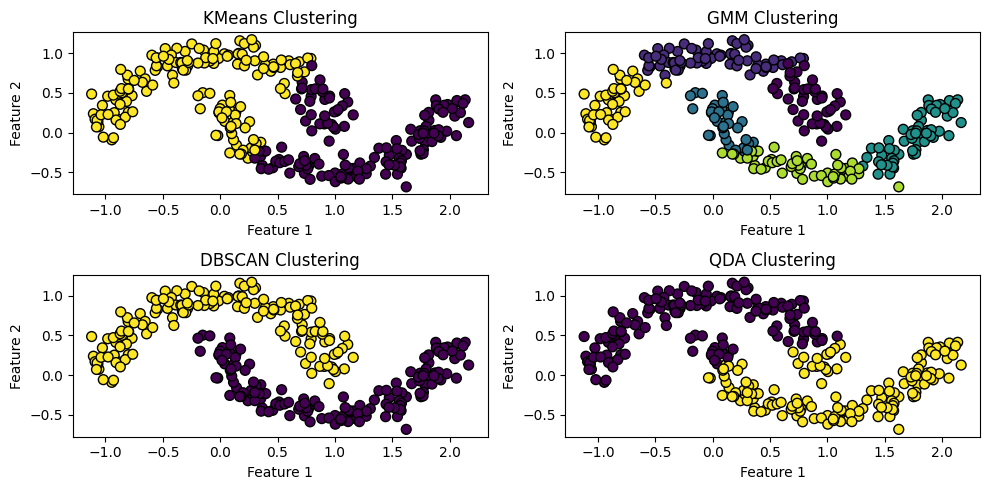

In [62]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# Plot KMeans Clustering
axs[0][0].scatter(X2[:, 0], X2[:, 1], c=labels_k, cmap='viridis', edgecolors='k', s=50)
axs[0][0].set_title('KMeans Clustering')
axs[0][0].set_xlabel('Feature 1')
axs[0][0].set_ylabel('Feature 2')

# Plot GMM Clustering
axs[0][1].scatter(X2[:, 0], X2[:, 1], c=labels_g, cmap='viridis', edgecolors='k', s=50)
axs[0][1].set_title('GMM Clustering')
axs[0][1].set_xlabel('Feature 1')
axs[0][1].set_ylabel('Feature 2')

# Plot DBSCAN Clustering
axs[1][0].scatter(X2[:, 0], X2[:, 1], c=labels_d, cmap='viridis', edgecolors='k', s=50)
axs[1][0].set_title('DBSCAN Clustering')
axs[1][0].set_xlabel('Feature 1')
axs[1][0].set_ylabel('Feature 2')

# Plot LDA Clustering
axs[1][1].scatter(X2[:, 0], X2[:, 1], c=labels_l, cmap='viridis', edgecolors='k', s=50)
axs[1][1].set_title('QDA Clustering')
axs[1][1].set_xlabel('Feature 1')
axs[1][1].set_ylabel('Feature 2')


plt.tight_layout()
plt.show()